In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import gc


## Set parameters and paths

In [2]:
# Define parameters
res = 1
n_hvg = 2000

In [3]:
# Define the input and output directories
input_dir = 'Input_files'
output_dir = 'Output_Seeker_2023_DS9'

# Create the output directory if it does not exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Get the list of files in the input directory
files = os.listdir(input_dir)
files

['DS12_2.h5ad',
 'DS13.h5ad',
 'DS1_1.h5ad',
 'DS3_1.h5ad',
 'DS3_2.h5ad',
 'DS1_3.h5ad',
 'DS1_2.h5ad',
 'DS3_3.h5ad',
 'DS2.h5ad',
 'DS9.h5ad',
 'DS12_1.h5ad',
 'DS1_4.h5ad',
 'DS8.h5ad']

## Analysis for Seeker_2023_DS9

In [4]:
file = 'DS9.h5ad'

studyID=file.split(".")[0]
print(f'Start process {studyID}')
adata=sc.read_h5ad(os.path.join(input_dir,file))
print(f'    Before process: number of obs {adata.n_obs}, number of var {adata.n_vars}')

#adata.layers["counts"]=adata.X.copy()
adata.var['GeneID']=adata.var.index
adata.var.set_index('feature_name',inplace=True)
if adata.raw is not None:
    adata.raw.var.set_index('feature_name', inplace=True)
else:
    print("    adata.raw is None, skipping setting index.")
adata.var["mt"]=adata.var_names.str.startswith("MT-")

print(f'    Start QC')
sc.pp.calculate_qc_metrics(adata,qc_vars=["mt"],inplace=True,log1p=True)
sc.pp.filter_genes(adata,min_cells=3)
adata=adata[adata.obs['nFeature_RNA']>200,:]
adata=adata[adata.obs['pct_counts_mt']<10,:]
adata=adata[adata.obs['nCount_RNA']>400,:]
adata=adata[adata.obs['nCount_RNA']<60000,:]
print(f'    After process: number of obs {adata.n_obs}, number of var {adata.n_vars}')

sc.pp.highly_variable_genes(adata,n_top_genes=n_hvg)
sc.tl.pca(adata)
sc.pp.neighbors(adata,n_neighbors=10,n_pcs=30)
sc.tl.umap(adata)
sc.tl.leiden(adata,resolution=res,n_iterations=2)


Start process DS9
    Before process: number of obs 45528, number of var 33693
    Start QC


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


    After process: number of obs 45492, number of var 19169


/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:553: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
adata.obs['cell_type'].value_counts()

cell_type
oligodendrocyte                                        18571
cerebellar granule cell                                 4765
microglial cell                                         3690
astrocyte                                               3593
GABAergic neuron                                        3358
oligodendrocyte precursor cell                          3094
glutamatergic neuron                                    2498
capillary endothelial cell                              1957
mural cell                                              1897
endothelial cell of artery                               747
leukocyte                                                499
differentiation-committed oligodendrocyte precursor      294
vascular associated smooth muscle cell                   263
central nervous system macrophage                        161
neuron                                                   105
Name: count, dtype: int64

In [6]:
adata

AnnData object with n_obs × n_vars = 45492 × 19169
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_cause_of_death', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'broad_cell_type', 'nCount_RNA', 'nFeature_RNA', 'CauseOfDeath_category', '10XBatch', 'SequencingPool', 'ID', 'percent.mt', 'scDblFinder_score', 'percent_ribo', 'AgeGroup', 'tissue_type', 'cell_type', 'assay

#### Figure 7A

    Start to plot DS9


/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


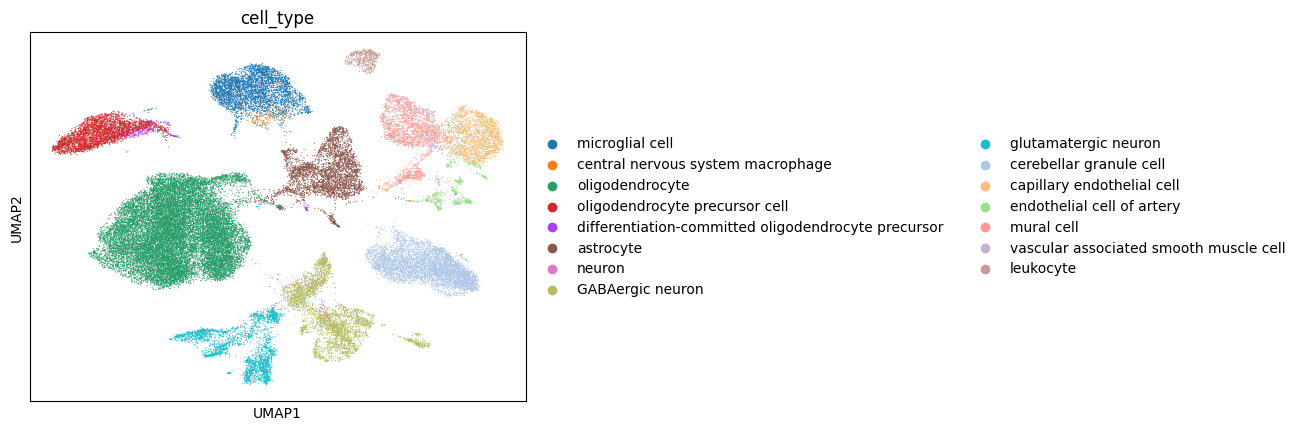

In [10]:
# Figure 7A
print(f'    Start to plot {studyID}')
sc.pl.umap(adata,color=['cell_type'],save = f'_{studyID}_allcelltypes_leiden_res{res}.pdf')

Index(['microglial cell', 'central nervous system macrophage',
       'oligodendrocyte', 'oligodendrocyte precursor cell',
       'differentiation-committed oligodendrocyte precursor', 'astrocyte',
       'neuron', 'GABAergic neuron', 'glutamatergic neuron',
       'cerebellar granule cell', 'capillary endothelial cell',
       'endothelial cell of artery', 'mural cell',
       'vascular associated smooth muscle cell', 'leukocyte'],
      dtype='object')


/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap'

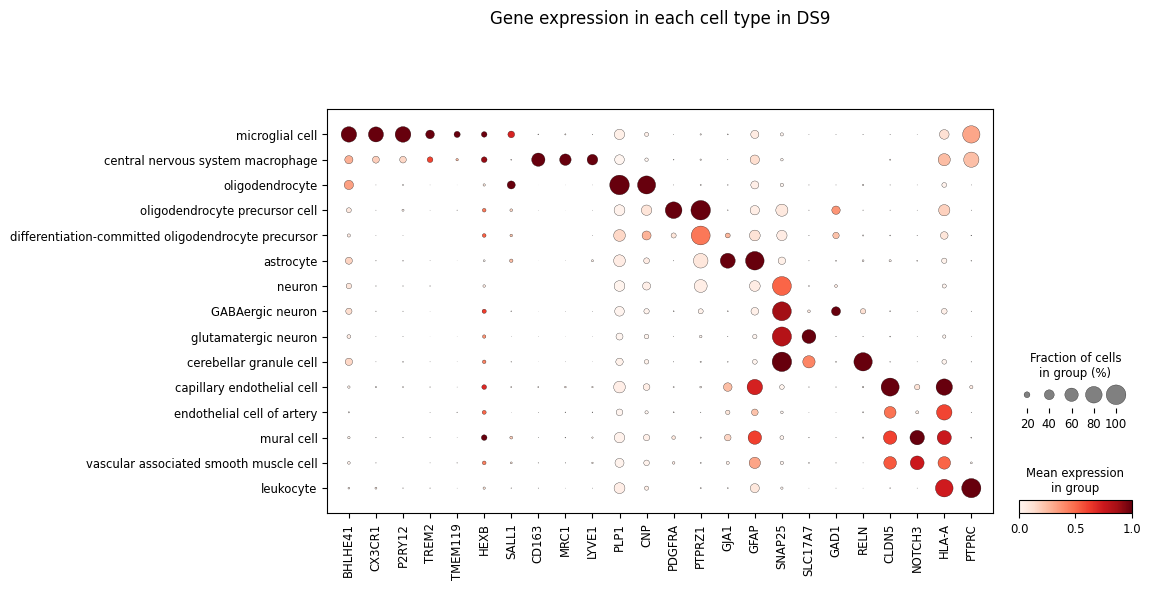

In [8]:
# Figure 7A
from collections import OrderedDict
goi = []
gene_categories = {
    "microglia": ['BHLHE41', 'CX3CR1', 'P2RY12','TREM2', 'TMEM119', 'HEXB', 'SALL1'],
    "CAM": ['CD163', 'MRC1', 'LYVE1'],
    "oligodendrocytes": ["PLP1", "CNP"],
    "precursor_cells": ["PDGFRA", "PTPRZ1"],
    "astrocytes": ["GJA1", "GFAP"],    
    "excitatory_neurons": ["SNAP25", "SLC17A7"],
    "inhibitory_neurons": ["SNAP25", "GAD1"],
    "reelin_positive_neurons": ["SNAP25", "RELN"],
    "endothelial_cells_pericytes": ["CLDN5", "NOTCH3"],
    "immune_cells": ["HLA-A", "PTPRC"]
}
unique_genes = OrderedDict()
for genes in gene_categories.values():
    for gene in genes:
        unique_genes[gene] = None
        
goi = list(unique_genes.keys())
goi_in_adata = [gene for gene in goi if gene in adata.var_names]

# Define the new order of levels
new_order = ['microglial cell', 'central nervous system macrophage','oligodendrocyte', 'oligodendrocyte precursor cell', 'differentiation-committed oligodendrocyte precursor','astrocyte','neuron','GABAergic neuron','glutamatergic neuron','cerebellar granule cell','capillary endothelial cell','endothelial cell of artery','mural cell','vascular associated smooth muscle cell','leukocyte']
adata.obs['cell_type'] = pd.Categorical(adata.obs['cell_type'], categories=new_order, ordered=True)
print(adata.obs['cell_type'].cat.categories)

sc.pl.dotplot(adata, goi_in_adata, groupby="cell_type", standard_scale="var",title=f'Gene expression in each cell type in {studyID}',save=f'{studyID}_celltype.pdf')

#### Figure 7B

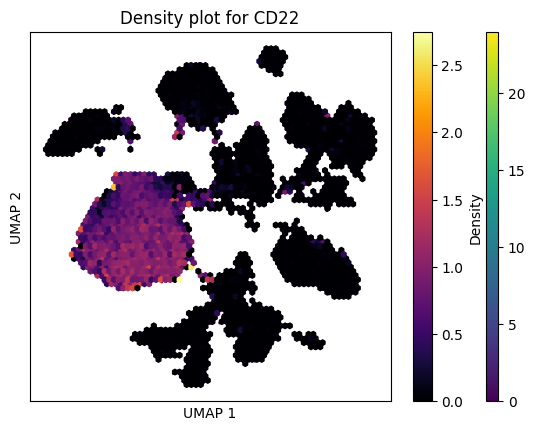

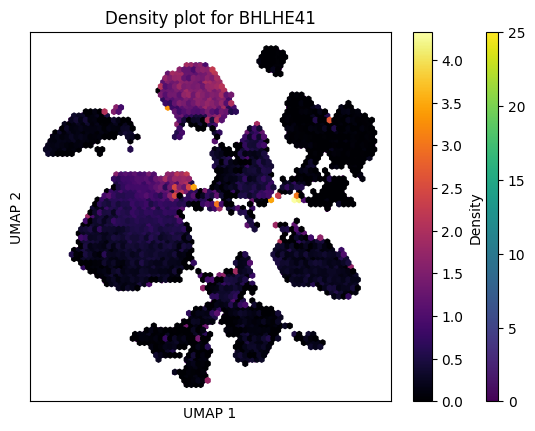

In [11]:
# Importing necessary libraries
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the markers you are interested in
markers = ["CD22",'BHLHE41']

# Loop over each marker to create a density plot on UMAP
for marker in markers:
    # Create a UMAP scatter plot colored by marker expression
    sc.pl.umap(adata, color=marker, show=False, cmap='viridis', legend_loc=None,s=20)
    
    # Overlay density (this step is similar to Nebulosa, but done manually)
    ax = plt.gca()  # Get current axis
    
    # Extract UMAP coordinates
    x = adata.obsm['X_umap'][:, 0]  # UMAP 1 coordinates
    y = adata.obsm['X_umap'][:, 1]  # UMAP 2 coordinates
    
    # Extract expression levels of the marker
    expression = adata[:, marker].X.toarray().flatten()
    
   # Create a 2D histogram / density plot
    hexbin_plot = ax.hexbin(x, y, C=expression, gridsize=70, cmap='inferno', reduce_C_function=np.mean, mincnt=1)

    # Set axis labels and title
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title(f'Density plot for {marker}')

    # Add the colorbar with the mappable hexbin plot
    plt.colorbar(hexbin_plot, label='Density')
    
    # Save or show the figure
    plt.savefig(f'figures/umap_density_{studyID}_{marker}.pdf')
    plt.show()

#### Extract microglia

In [12]:
adata_m = adata[adata.obs['cell_type']=='microglial cell', :]
adata_m

View of AnnData object with n_obs × n_vars = 3690 × 19169
    obs: 'mapped_reference_assembly', 'mapped_reference_annotation', 'alignment_software', 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'donor_cause_of_death', 'donor_living_at_sample_collection', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'sample_derivation_process', 'sample_source', 'suspension_derivation_process', 'suspension_dissociation_reagent', 'suspension_uuid', 'suspension_type', 'tissue_handling_interval', 'library_uuid', 'assay_ontology_term_id', 'library_starting_quantity', 'sequencing_platform', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'broad_cell_type', 'nCount_RNA', 'nFeature_RNA', 'CauseOfDeath_category', '10XBatch', 'SequencingPool', 'ID', 'percent.mt', 'scDblFinder_score', 'percent_ribo', 'AgeGroup', 'tissue_type', 'cell_type',

#### Figure 7D

/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:553: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}


/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


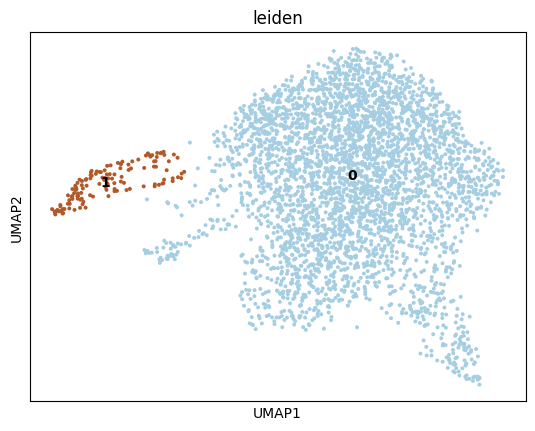

In [13]:
# Figure 7D
res = 0.05
# Recluster microglia
sc.pp.highly_variable_genes(adata_m,n_top_genes=n_hvg)
sc.tl.pca(adata_m)
sc.pp.neighbors(adata_m,n_neighbors=10,n_pcs=30)
sc.tl.umap(adata_m)
sc.tl.leiden(adata_m,resolution=res,n_iterations=2)
sc.pl.umap(adata_m, color=['leiden'], palette='Paired',legend_loc='on data', save=f'_{studyID}_within_microglia_leiden_res{res}.pdf')    

#### Supplementary figure

/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap'

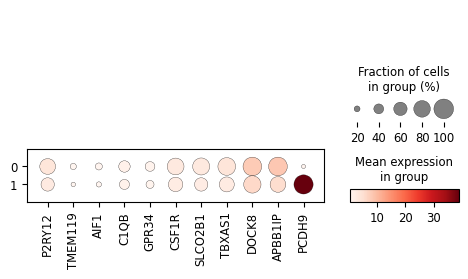

In [16]:
# supplementary figure
goi=['P2RY12','TMEM119','AIF1','C1QB','CX3R1','GPR34','CSF1R','SLCO2B1','TBXAS1','DOCK8','APBB1IP','PCDH9']

goi_in_adata=[gene for gene in goi if gene in adata_m.var_names]
sc.pl.dotplot(adata_m, goi_in_adata, groupby="leiden",save=f'{studyID}_within_microglia_goi_res{res}_check_microgliaMarker.pdf')

#### Identify marker gene

    Start to identify marker gene DS9


/Users/yelin.zhao/opt/anaconda3/envs/py3_9_R4_30/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


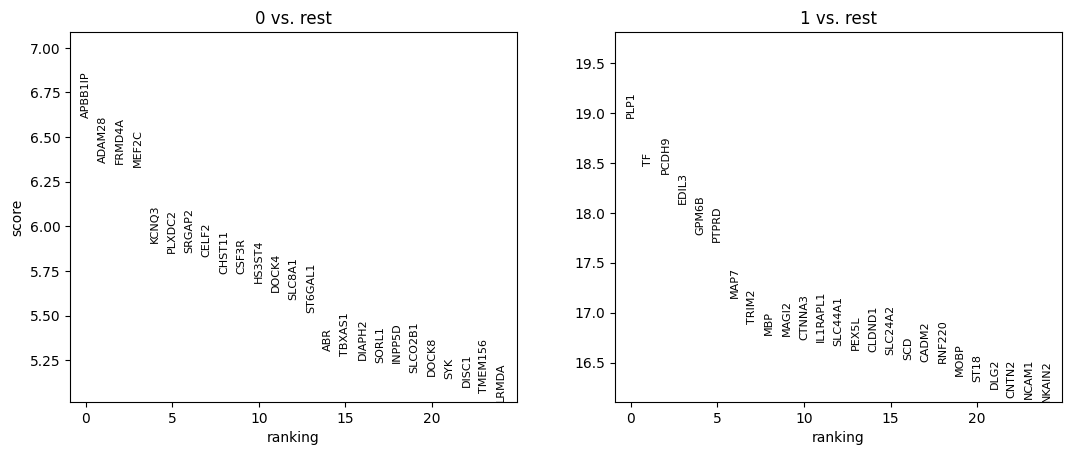

In [18]:
print(f'    Start to identify marker gene {studyID}')
sc.tl.rank_genes_groups(adata_m, "leiden", method="wilcoxon")
sc.pl.rank_genes_groups(adata_m, n_genes=25, sharey=False,save=f'{studyID}_clustermarker_res{res}_within_microglia.pdf')
cluster_marker = pd.DataFrame(adata_m.uns["rank_genes_groups"]["names"])
cluster_marker.to_csv(f'{output_dir}/{studyID}_clustermarker_within_microglia.csv')

#### Figure 7D Plot CD22 and BHLE41

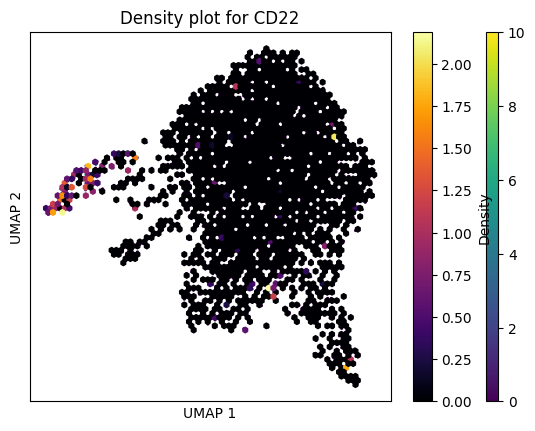

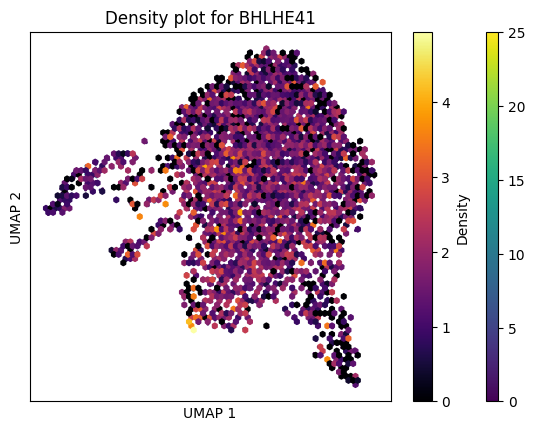

In [20]:
# Importing necessary libraries
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

# Define the markers you are interested in
markers = ["CD22",'BHLHE41']

# Loop over each marker to create a density plot on UMAP
for marker in markers:
    # Create a UMAP scatter plot colored by marker expression
    sc.pl.umap(adata_m, color=marker, show=False, cmap='viridis', legend_loc=None,s=20)
    
    # Overlay density (this step is similar to Nebulosa, but done manually)
    ax = plt.gca()  # Get current axis
    
    # Extract UMAP coordinates
    x = adata_m.obsm['X_umap'][:, 0]  # UMAP 1 coordinates
    y = adata_m.obsm['X_umap'][:, 1]  # UMAP 2 coordinates
    
    # Extract expression levels of the marker
    expression = adata_m[:, marker].X.toarray().flatten()
    
   # Create a 2D histogram / density plot
    hexbin_plot = ax.hexbin(x, y, C=expression, gridsize=70, cmap='inferno', reduce_C_function=np.mean, mincnt=1)

    # Set axis labels and title
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.title(f'Density plot for {marker}')

    # Add the colorbar with the mappable hexbin plot
    plt.colorbar(hexbin_plot, label='Density')
    
    # Save or show the figure
    plt.savefig(f'figures/umap_density_{studyID}_{marker}_within_macrolia.pdf')
    plt.show()